In [52]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import urllib
from sklearn import tree, preprocessing
from sklearn.model_selection import train_test_split, cross_val_score

<b> Import Penguins Data <b>

In [19]:
url = 'https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv'
penguins = pd.read_csv(url)
penguins.dropna(subset = ["Delta 15 N (o/oo)"])
penguins["Species"] = penguins["Species"].str.split().str.get(0)

<b> Observe Relationship Between Culmen Depth and Length by Species<b>

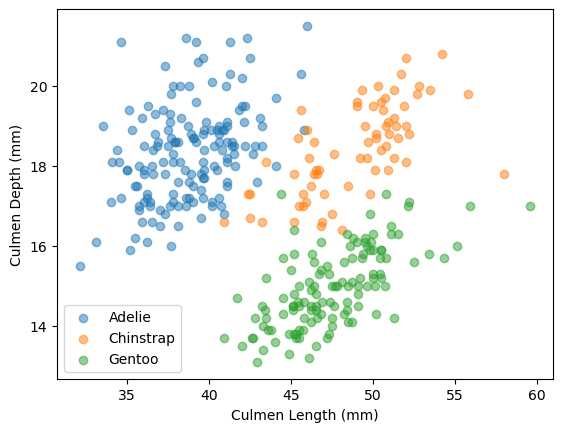

In [20]:
fig, ax = plt.subplots(1)
ax.set(xlabel = "Culmen Length (mm)",
    ylabel = "Culmen Depth (mm)")
for species in penguins.Species.unique():
    subset = penguins.loc[penguins.Species == species]
    ax.scatter(subset['Culmen Length (mm)'], subset['Culmen Depth (mm)'], label= species, alpha = 0.5)
ax.legend()

For penguins within a given species, there is a positive correlation between the culmen length and culmen depth. Now that we know that there is a relationship between these traits and certain species, we can take a closer look at the traits of certain species by calculating mean.

In [31]:
grouped = penguins.groupby(["Species"])[ ["Culmen Length (mm)", "Culmen Depth (mm)"]]
grouped.mean().round(2)

,Culmen Length (mm),Culmen Depth (mm)
Species,,
Adelie,38.79,18.35
Chinstrap,48.83,18.42
Gentoo,47.50,14.98


<b> Observe Traits within Species in Different Locations <b>

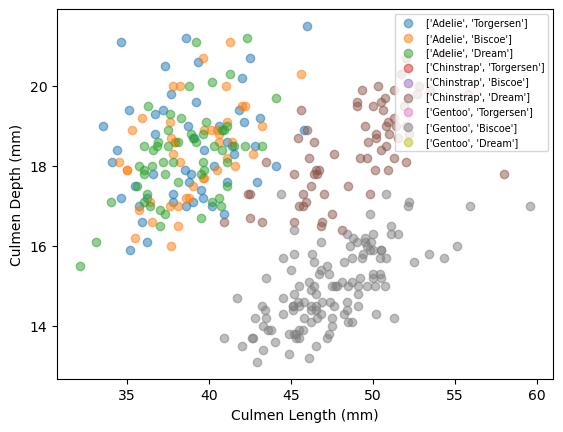

In [24]:
fig, ax = plt.subplots(1)
ax.set(xlabel = "Culmen Length (mm)",
ylabel = "Culmen Depth (mm)")
for species in penguins.Species.unique():
    for island in penguins.Island.unique():
        subset = penguins.loc[(penguins.Species == species) & (penguins.Island== island)]
        ax.scatter(subset['Culmen Length (mm)'], subset['Culmen Depth (mm)'],label = [species, island], alpha = 0.5)
ax.legend(loc ="upper right", prop = { "size": 7})

For penguins within a given species in a certain location, there is a positive correlation between the culmen length and culmen depth. Now that we know that there is a relationship between these traits and certain species, we can take a closer look at the traits of certain species by calculating mean.

In [30]:
grouped = penguins.groupby(["Species","Island"])[ ["Culmen Length (mm)", "Culmen Depth (mm)"]]
grouped.mean().round(2)

Culmen Length (mm)  Culmen Depth (mm)
Species   Island                                          
Adelie    Biscoe                  38.98              18.37
          Dream                   38.50              18.25
          Torgersen               38.95              18.43
Chinstrap Dream                   48.83              18.42
Gentoo    Biscoe                  47.50              14.98

<b>Miniature Decision Tree for Distinguishing Penguin Species<b>

Notice:
1) Torgersen only has Adelie Penguins
2) Adelie penguins on dream have average culmen length of 38 while chinstrap penguins on dream have average culmen length of 48. 
3) Adelie penguins on Biscoe have average culmen length of 38 while gentoo penguins on biscoe have average length of 48.

In [34]:
def decision_tree(island, culmen_length):
    if island == "Torgersen":
        return "Adelie"
    elif island == "Dream":
        if culmen_length < 40:
            return "Adelie"
        else:
            return "Chinstrap"
    else:
        if culmen_length < 40:
            return "Adelie"
        else:
            return "Gentoo"

In [37]:
guesser = lambda r: decision_tree(r["Island"], r["Culmen Length (mm)"])
penguins["Guess"] = penguins.apply(guesser, axis = 1)
average=np.array(penguins["Guess"] == penguins["Species"]).mean()
print("The decision tree predicts penguin species with accuracy ", average)

The decision tree predicts penguin species with accuracy  0.9040697674418605


<b>Automated Decision Tree for Predicting Penguin Species<b>

In this model, we will only focus on species, flipper length, body mass, and sex.

In [40]:
penguins=penguins[["Species", "Flipper Length (mm)", "Body Mass (g)", "Sex"]]
penguins=penguins.dropna()

In [44]:
le=preprocessing.LabelEncoder()
penguins["Species"]=le.fit_transform(penguins["Species"])
penguins["Sex"]=le.fit_transform(penguins["Sex"])
X=penguins.drop(["Species"],axis=1)
y=penguins["Species"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)


In [46]:
T=tree.DecisionTreeClassifier(max_depth=3)
T.fit(X_train,y_train)
print(T.score(X_train,y_train),T.score(X_test,y_test))

0.8389513108614233 0.7313432835820896


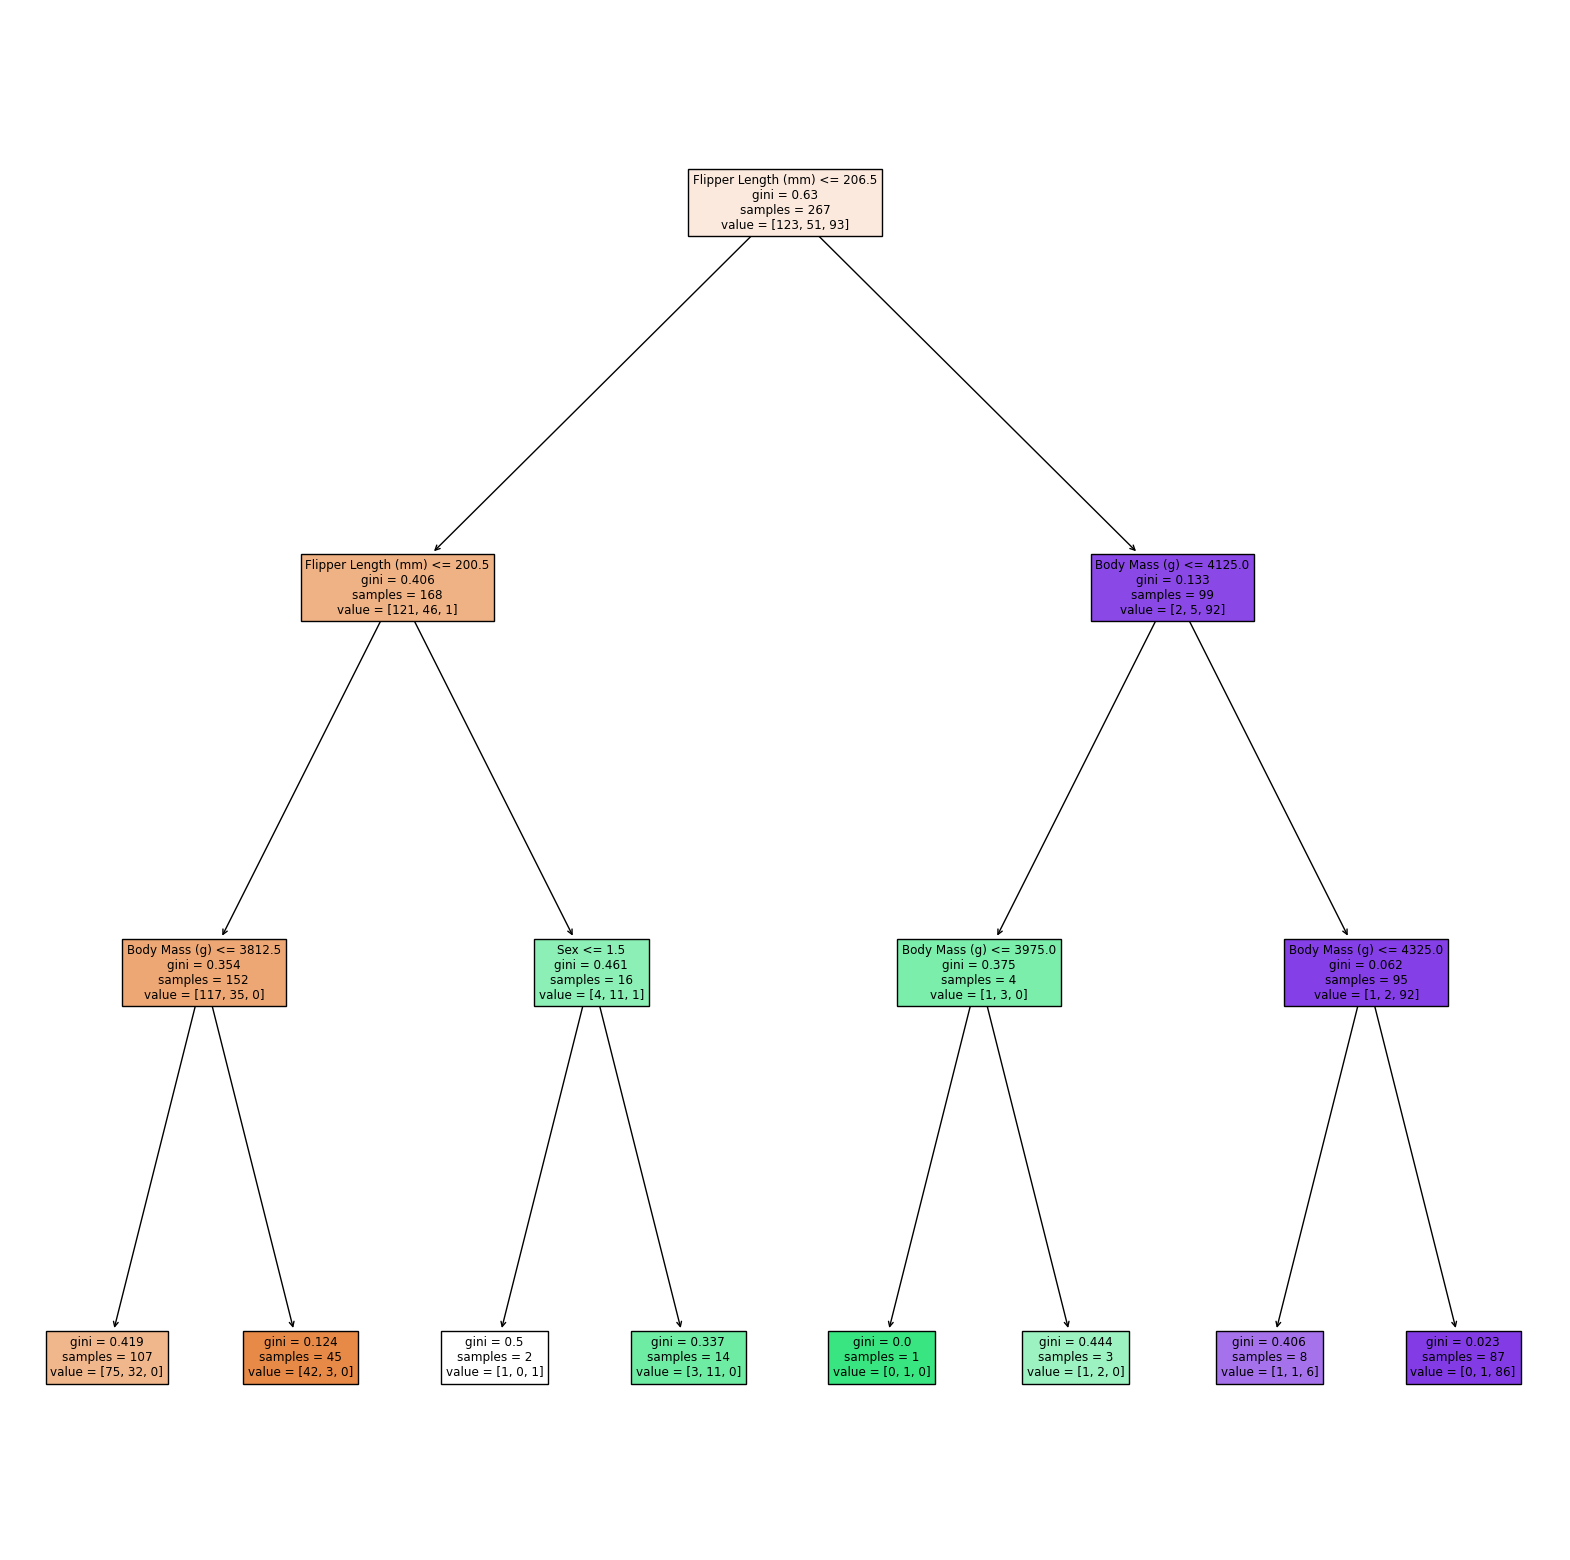

In [47]:
fig, ax = plt.subplots(1, figsize = (20, 20))
p = tree.plot_tree(T, filled = True, feature_names = X.columns)

<b> Using Cross Validation to Estimate Optimal Tree<b> 

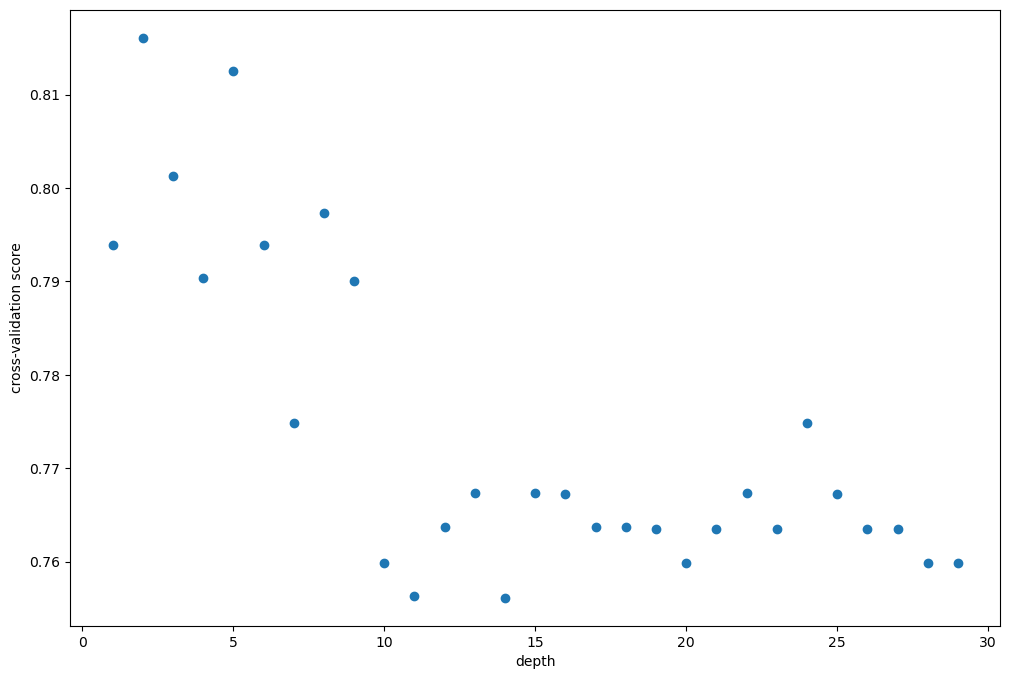

In [53]:
fig, ax =plt.subplots(1,figsize=(12,8))
depths=range(1,30)
scores=[]
best_score=0
best_max_depth=0

for d in depths:
    T=tree.DecisionTreeClassifier(max_depth=d)
    cv_scores=cross_val_score(T, X_train,y_train,cv=10)
    new_score=float(np.mean(cv_scores))
    scores.append(new_score)
    if new_score>best_score:
        best_score=new_score
        best_max_depth=d

ax.scatter(depths, scores)
ax.set(xlabel="depth",ylabel="cross-validation score")
plt.show()

In [54]:
T=tree.DecisionTreeClassifier(max_depth=best_max_depth)
T.fit(X_train,y_train)
print(T.score(X_test,y_test))

0.746268656716418
